In [1]:
import sqlite3, string
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from imblearn.pipeline import Pipeline
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = sqlite3.connect('prods.db')
products = pd.read_sql("SELECT * FROM products", con)

products.drop_duplicates(inplace=True)
products.dropna(inplace=True)

products['category_name'] = products['category_name'].str.lower()

products.head()

,id,shop,product_id,name,code,category_name,category_code,price
0,1,perekrestok,32392,"Голубика Маркет Fresh, 125г",golubika-market-fresh-125g,готовимся к праздникам,gotovimsa-k-prazdnikam,239.99
1,2,perekrestok,10299,"Горошек зелёный Маркет Перекрёсток, 400г",gorosek-zelenyj-market-perekrestok-400g,готовимся к праздникам,gotovimsa-k-prazdnikam,93.99
2,3,perekrestok,404062,Колбаса Докторская варёная категории А в натур...,kolbasa-doktorskaa-varenaa-kategorii-a-v-natur...,готовимся к праздникам,gotovimsa-k-prazdnikam,779.99
3,4,perekrestok,34160,Клементины,klementiny,готовимся к праздникам,gotovimsa-k-prazdnikam,229.99
4,5,perekrestok,32227,Бананы,banany,готовимся к праздникам,gotovimsa-k-prazdnikam,119.99


<Axes: >

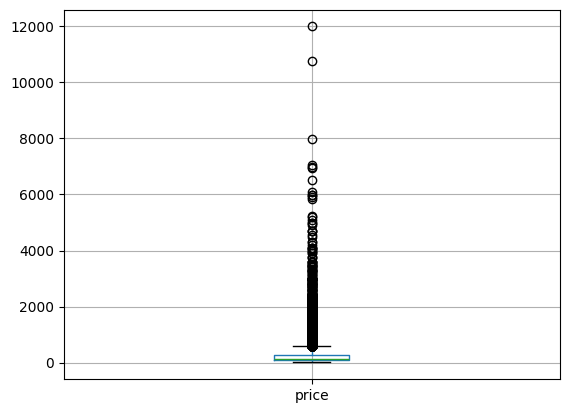

In [3]:
products.boxplot(column=['price'])

In [4]:
products.sort_values(by='price', ascending=False).head(15)

,id,shop,product_id,name,code,category_name,category_code,price
6136,6137,ashan,13403940,"Бренди Torres, Jaime I Испания, 0,7 л + 2 Стакана",torres-30-hayme-i-0-70,алкоголь (самовывоз),alkogol,11999.95
7751,7752,ashan,16016800,"Коньяк «Коктебель» 25 лет Россия, 0,7 л",koktebel-staryy-25-let-0-7,алкоголь (самовывоз),alkogol,10768.99
7679,7680,ashan,6063235,Коньяк Lheraud Vieux Millenaire в подарочной у...,konyak_lero_ve_milliner_07l_43,алкоголь (самовывоз),alkogol,7999.00
7690,7691,ashan,6062554,"Коньяк Remy Martin VSOP Франция, 0,7 л",remi_martin_vsop_konyak07lpu_40,алкоголь (самовывоз),alkogol,7067.99
7673,7674,ashan,8746843,Коньяк Hine Rare в подарочной упаковке Франция...,konyak_hayn_pap_vsop_07l_40,алкоголь (самовывоз),alkogol,6999.00
7648,7649,ashan,10912670,Коньяк ARARAT Двин в подарочной упаковке Армен...,konyak-ararat-dvin-p-u-0-7,алкоголь (самовывоз),alkogol,6947.99
6079,6080,ashan,12801143,"Аперитив Aperol Aperitivo Италия, 3 л",spirt-napitok-aperol-11-3l,алкоголь (самовывоз),alkogol,6499.95
7647,7648,ashan,15701531,"Коньяк ARARAT Васпуракан Армения, 0,7 л",konyak-ararat-vaspurakan-0-7,алкоголь (самовывоз),alkogol,6092.99
423,424,perekrestok,40091,Икра нерки зернистая,ikra-nerki-zernistaa,готовимся к праздникам,gotovimsa-k-prazdnikam,5999.00
7656,7657,ashan,11682659,Коньяк Camus V. S. O. P в подарочной упаковке ...,konyak-kamyu-vsop-0-7-p-u-40,алкоголь (самовывоз),alkogol,5998.99


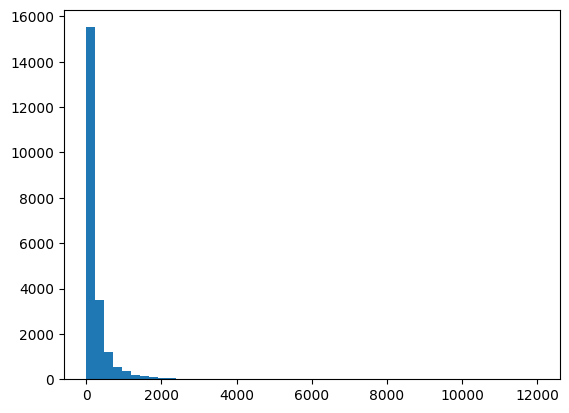

In [5]:
data = products['price']
plt.hist(data, bins=50)
plt.show()

In [6]:
products['price'].describe()

count    21769.000000
mean       261.487882
std        412.358708
min          1.590000
25%         74.990000
50%        139.900000
75%        279.000000
max      11999.950000
Name: price, dtype: float64

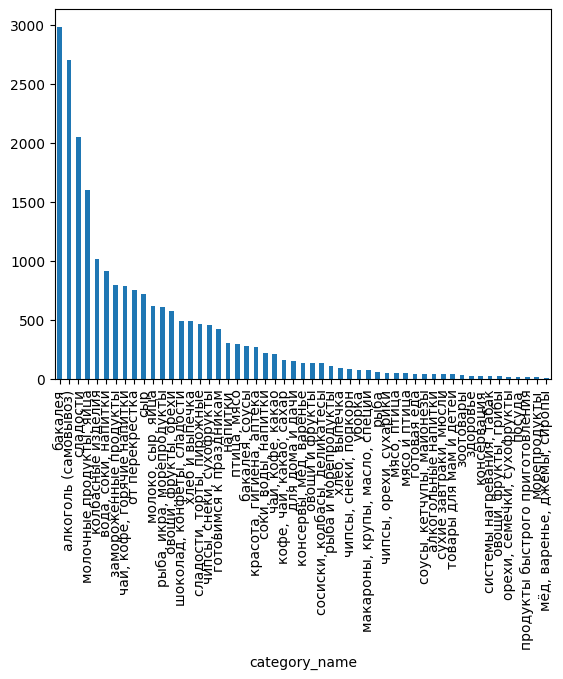

In [7]:
products['category_name'].value_counts().plot.bar()
plt.show()

In [8]:
products['general_category'] = np.nan

def general_category(row):
    if 'молоко' in row['category_name'] or 'молочные' in row['category_name'] or 'сыр' in row['category_name'] or 'яйца' in row['category_name']:
        return 'Молочные продукты'
    elif 'мясные' in row['category_name'] or 'колбасные' in row['category_name']  or 'мясо' in row['category_name'] or 'сосиски' in row['category_name']:
        return 'Мясные продукты'
    elif 'рыба' in row['category_name']:
        return 'Рыба и морепродукты'
    elif 'овощи' in row['category_name'] or 'фрукты' in row['category_name'] or 'орехи' in row['category_name'] or 'снеки' in row['category_name']:
        return 'Овощи, фрукты, закуски'
    elif 'бакалея' in row['category_name'] or 'соусы' in row['category_name'] or 'макароны' in row['category_name'] or 'консервы' in row['category_name'] or 'мед' in row['category_name'] or 'варенье' in row['category_name']:
        return 'Бакалея и соусы'
    elif 'сладости' in row['category_name']:
        return 'Сладости'
    # elif 'консервы' in row['category_name'] or 'мед' in row['category_name'] or 'варенье' in row['category_name']:
    #     return 'Консервы, мед, варенье'
    elif 'выпечка' in row['category_name'] or 'хлеб' in row['category_name']:
        return 'Выпечка и хлеб'
    elif 'чай' in row['category_name'] or 'кофе' in row['category_name'] or 'сахар' in row['category_name']:
        return 'Чай, кофе, какао, сахар'
    elif 'напитки' in row['category_name'] or 'алкоголь' in row['category_name']:
        return 'Напитки'
    else:
        return 'Прочее'

products['general_category'] = products.apply(general_category, axis=1)
products.general_category = products.general_category.astype('category')
products.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,general_category
6051,6052,ashan,6063283,Коньяк «Старейшина» in Single Barrel 7 лет Рос...,stareyshina_7l_single_45_05l,алкоголь (самовывоз),alkogol,1249.99,Напитки
17496,17497,ashan,133990,"Вермишель 3 GLOCKEN мелкая, 250 г",makaronnye-izdeliya-3-glocken-vermishel-melkay...,бакалея,bakaleya,109.90,Бакалея и соусы
3668,3669,magnit,1000357538,Сметана Эконива 20% 300г,smetana-ekoniva-20-300g,"молоко, сыр, яйца",moloko-syr-yaytsa,79.99,Молочные продукты
17137,17138,ashan,8338761,"Аджика «Каждый день» Кавказская, 190 г",kdsous_adzhika_190g,бакалея,bakaleya,40.98,Бакалея и соусы
9051,9052,ashan,13202605,"Творожок «Савушкин» груша банан 3,5% БЗМЖ, 120 г",pasta-tv-gr-banan-3-5-120-bzmzh,"молочные продукты, яйца",moloko-syr-yayca,51.99,Молочные продукты
6063,6064,ashan,18416889,"Настойка «Хаски» Цитрус микс Россия, 0,5 л",nastoyka-haski-citrus-miks-0-5,алкоголь (самовывоз),alkogol,329.00,Напитки
4959,4960,magnit,1699910070,Конфеты Lucky Days,konfety-lucky-days,"сладости, торты, пирожные",sladosti-torty-pirozhnye,51.98,Сладости
4813,4814,magnit,1000261993,Яйцо с игрушкой Kinder Сюрприз 20г в ассортименте,yaytso-s-igrushkoy-kinder-syurpriz-20g-v-assor...,"сладости, торты, пирожные",sladosti-torty-pirozhnye,89.99,Сладости
9857,9858,ashan,267081,"Йогурт питьевой «Фруате» с соком черники 1,5%,...",yogurt-fruate-s-sokom-cherniki-1-5-450-g,"молочные продукты, яйца",moloko-syr-yayca,59.99,Молочные продукты
3075,3076,perekrestok,374250,Зубная паста Mychoi Природная Защита с лечебны...,zubnaa-pasta-mychoi-prirodnaa-zasita-s-lecebny...,"красота, гигиена, аптека",krasota-gigiena-apteka,299.99,Прочее


In [9]:
products.category_name = products.category_name.astype('category')
products.category_code = products.category_code.astype('category')
products.general_category = products.general_category.astype('category')
products.dtypes

id                     int64
shop                  object
product_id             int64
name                  object
code                  object
category_name       category
category_code       category
price                float64
general_category    category
dtype: object

In [26]:
def preprocess_text(input_string):
    clear_string = input_string.translate(str.maketrans('', '', string.punctuation + string.digits))
    clear_string = clear_string.lower()
    return clear_string

products['clear_category']=products['category_name'].apply(preprocess_text)
products.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,general_category,clear_category
12153,12154,ashan,17840665,"Бекон сырокопченый «Самсон» классический, 140 г",bekon-klassicheskiy-samson-140g,колбасные изделия,kolbasnye-izdeliya,187.99,Мясные продукты,колбасные изделия
11211,11212,ashan,14714074,"Шеи цыпленка бройлера (1,3-1,9 кг), 1 упаковка...",shei-cb-zam-ves,"птица, мясо",ptica-myaso,142.99,Мясные продукты,птица мясо
13557,13558,ashan,4687200,"Смесь овощная Рисовая для жарки замороженная, вес",risovaya_smes_dlya_zharki_ves,замороженные продукты,zamorozhennye-produkty,271.99,Прочее,замороженные продукты
5761,5762,magnit,1000023046,Напиток Flash Energy энергетический 500мл,napitok-flash-energy-energetichesky-500ml,напитки,napitki,49.99,Напитки,напитки
18600,18601,ashan,5471195,Мука амарантовая «Масляный Король» амарантовая...,muka_amarantovaya_300_gr_mk,бакалея,bakaleya,125.99,Бакалея и соусы,бакалея
19737,19738,ashan,138334,"Суп Куриный Gallina Blanca со звездочками, 67 г",sup-gallina-blanca-kurinyy-so-zvezdochkami-67-g,бакалея,bakaleya,33.99,Бакалея и соусы,бакалея
18183,18184,ashan,8340776,"Лапша GauDo Том Ям со вкусом креветки, 65 г",gaudo_lapsha_bp_tom_yam_65g,бакалея,bakaleya,123.99,Бакалея и соусы,бакалея
7265,7266,ashan,10912725,"Водка «Русский Стандарт» Original Россия, 0,375 л",vodka-russkiy-stand-0-375l-40,алкоголь (самовывоз),alkogol,466.99,Напитки,алкоголь самовывоз
145,146,perekrestok,265827,Печенье сахарное Twix с карамелью покрытое мол...,pecene-saharnoe-twix-s-karamelu-pokrytoe-moloc...,готовимся к праздникам,gotovimsa-k-prazdnikam,149.99,Прочее,готовимся к праздникам
14295,14296,ashan,136845,"Тунец Iberica в оливковом масле, 160 г",tunec-iberica-v-olivkovom-masle-160-g,"рыба, икра, морепродукты",ryba-ikra-moreprodukty,440.99,Рыба и морепродукты,рыба икра морепродукты


In [11]:
x = products.clear_category
y = products.general_category
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print('Score:', text_clf.score(X_test, y_test))

Score: 0.9997216035634744


In [12]:
joblib.dump(text_clf, 'model.pkl')

['model.pkl']

In [13]:
c = sqlite3.connect('prods.db')
pr = pd.read_sql("SELECT * FROM products", c)

pr.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price
13138,13139,ashan,12508966,"Сухарики Хрусteam Багет Красная икра, 60 г",hrustim-baget-krasnaya-ikra-60g,"Чипсы, снеки, сухофрукты",orehi-suhofrukty-sneki,52.99
4401,4402,magnit,1000177668,Колбаса Папа может Филейная вареная 500г,kolbasa-papa-mozhet-fileynaya-varenaya-500g,"Сосиски, колбасы, деликатесы",sosiski-kolbasy-delikatesy,279.99
15014,15015,ashan,14889584,"Хлебцы Magic Grain Ржаные с семенами льна, под...",hlebcy-rzh-s-sem-lna-pods-kunzh-160,Хлеб и выпечка,hlebnaya-vypechka,143.99
16137,16138,ashan,8340942,"Вафли «Артек плюс» шоколадные, 220 г",vafli_volzh_shokolad_220g,Сладости,konditerskie_izdeliya,56.99
16637,16638,ashan,17923929,"Конфеты «Славянка» в стране лилипутов, 213 г",konf-v-strane-liliputov-213gr,Сладости,konditerskie_izdeliya,175.99
13576,13577,ashan,18507771,Мороженое «Русский Холодъ» Настоящий пломбир в...,rozhok-nast-pl-vanil-110g-bzmzh,Замороженные продукты,zamorozhennye-produkty,95.99
10174,10175,ashan,5471199,Масса творожная «Фермерский продукт» с курагой...,mas_tvor_s_kur_ferm_prod_300g,"Молочные продукты, яйца",moloko-syr-yayca,157.99
5965,5966,magnit,1000310698,Мороженое Maxiduo Страчателла брикет 92г,morozhenoye-maxiduo-strachatella-briket-92g,Замороженные продукты,zamorozhennye-produkty,59.99
20876,20877,ashan,100551,"Сок яблочный Rich осветленный, 1 л",sok-rich-yablochnyy-osvetlennyy-100-1-l,"Вода, соки, напитки",voda-soki-napitki,149.90
2290,2291,perekrestok,44374,Напиток сокосодержащий Добрый Нежная клубника ...,napitok-sokosoderzasij-dobryj-neznaa-klubnika-...,"Соки, воды, напитки",soki-vody-napitki,65.99


In [14]:
with open('model.pkl', 'rb') as f:
    clf2 = joblib.load(f)

def preprocess_text(input_string):
    clear_string = input_string.translate(str.maketrans('', '', string.punctuation + string.digits))
    clear_string = clear_string.lower()
    return clear_string

pr['clear_category'] = pr['category_name'].apply(preprocess_text)

prediction = clf2.predict(pr['clear_category'])
pr['general_category'] = prediction

pr.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,clear_category,general_category
12579,12580,ashan,8256675,"Брокколи «Каждый день» замороженная, 400 г",kdbrokkoli400g,"Овощи, фрукты, орехи",ovoschi-frukty-zelen-griby-yagody,99.98,овощи фрукты орехи,"Овощи, фрукты, закуски"
1168,1169,perekrestok,378881,Устройство зарядное с питанием от бортовой сет...,ustrojstvo-zaradnoe-s-pitaniem-ot-bortovoj-set...,От Перекрёстка,ot-perekrestka,349.99,от перекрёстка,Прочее
21234,21235,ashan,5440242,Вода питьевая «Святой Источник» с соком лимона...,sv_istochnik_vodalimon_05,"Вода, соки, напитки",voda-soki-napitki,53.99,вода соки напитки,Напитки
15675,15676,ashan,5781492,"Новогодний подарок Мечта сластены, 1 кг",npmechta_slasteny1000g,Сладости,konditerskie_izdeliya,1590.00,сладости,Сладости
1290,1291,perekrestok,405696,Биойогурт Актибио со злаками обогащенный бифид...,biojogurt-aktibio-so-zlakami-obogasennyj-bifid...,"Молоко, сыр, яйца",moloko-syr-ajca,59.99,молоко сыр яйца,Молочные продукты
21639,21640,ashan,5463899,"Сок «Мамина дача» Томат с солью, 750 мл",sok_tomat_075_l_mamina_dacha,"Вода, соки, напитки",voda-soki-napitki,142.99,вода соки напитки,Напитки
10866,10867,ashan,3231695,"Сыр плавленый Rokler слайсы сливочные БЗМЖ, 130 г",syr-plavlennyy-rokler-slays-slivochnyy-130-g,Сыр,syry,71.99,сыр,Молочные продукты
9786,9787,ashan,14797587,"Майонез «Mr. Ricco» Укроп 50%, 400 г",mz_ukrop_50_400ml_mrricco,"Молочные продукты, яйца",moloko-syr-yayca,112.99,молочные продукты яйца,Молочные продукты
16195,16196,ashan,5471587,Конфеты шоколадные «Россия - Щедрая душа!» Род...,konf_rodprostory_kokos_172g,Сладости,konditerskie_izdeliya,280.99,сладости,Сладости
20507,20508,ashan,131811,"Кофе в зернах Egoiste Noir, 250 г",kofe-egoiste-noir-v-zernah-250-g,"Чай, кофе, горячие напитки",chay-kofe-sladosti,676.49,чай кофе горячие напитки,"Чай, кофе, какао, сахар"


C:\Users\shany\AppData\Local\Temp\ipykernel_15872\1463622790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')


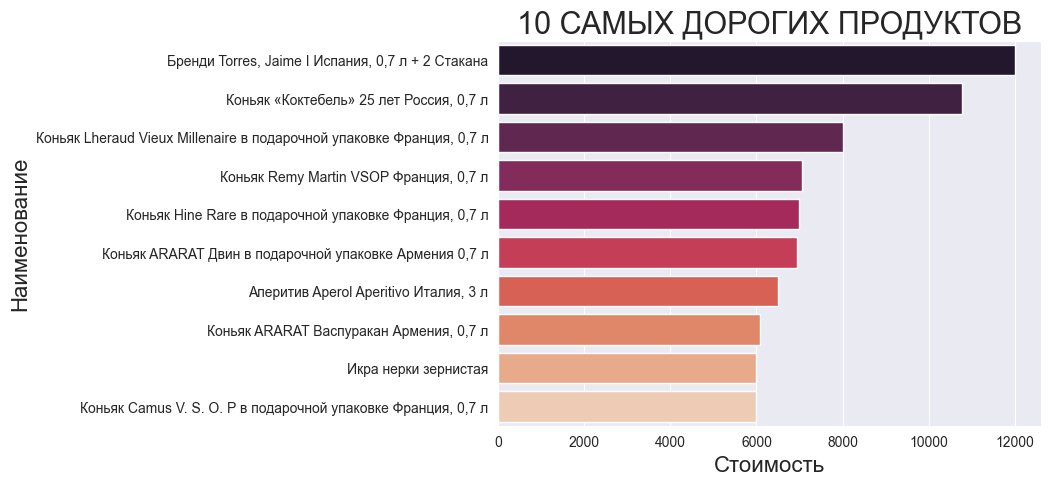

In [15]:
top_10 = pr.sort_values(by='price', ascending=False).head(10)
sns.set_style('darkgrid')
plt.figure(figsize=(7,5))
sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')
plt.title('10 САМЫХ ДОРОГИХ ПРОДУКТОВ', fontsize=22)
plt.xlabel('Стоимость', fontsize=16)
plt.ylabel('Наименование', fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()
#plt.savefig('top_10_max.png', bbox_inches = 'tight')

C:\Users\shany\AppData\Local\Temp\ipykernel_15872\3578203917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')


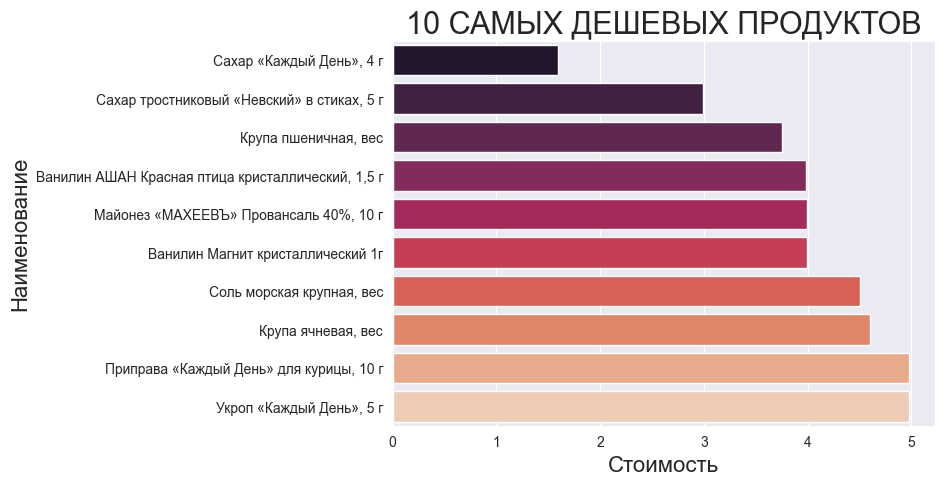

In [16]:
top_10 = pr.sort_values(by='price', ascending=True).head(10)
sns.set_style('darkgrid')
plt.figure(figsize=(7,5))
sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')
plt.title('10 САМЫХ ДЕШЕВЫХ ПРОДУКТОВ', fontsize=22)
plt.xlabel('Стоимость', fontsize=16)
plt.ylabel('Наименование', fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()

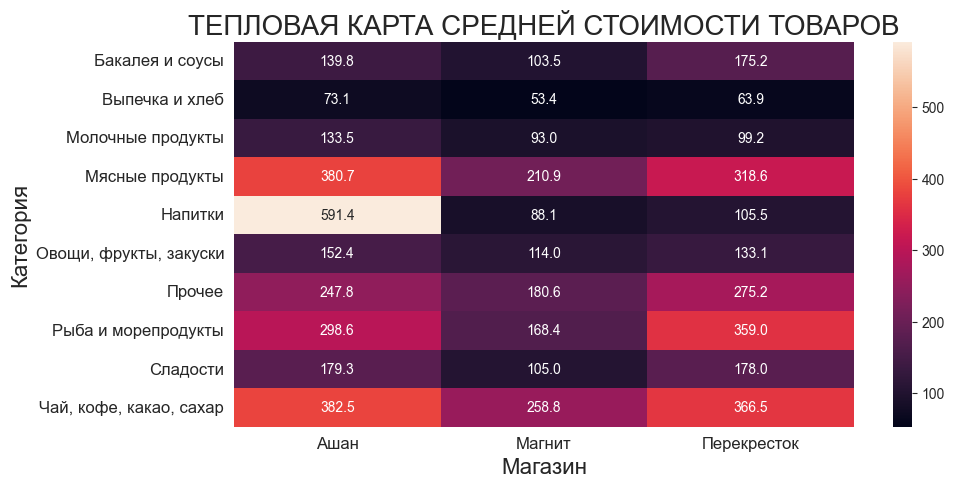

In [17]:
conditions = [(pr['shop'] == 'ashan'), (pr['shop'] == 'magnit'), (pr['shop'] == 'perekrestok')]
values = ['Ашан', 'Магнит', 'Перекресток']
pr['shop_rus'] = np.select(conditions, values)
pr.shop_rus = pr.shop_rus.astype('category')

plt.figure(figsize=(10,5))
pivot_table = pr.pivot_table(index='general_category', columns='shop_rus', values='price', aggfunc='mean')
plt.title('ТЕПЛОВАЯ КАРТА СРЕДНЕЙ СТОИМОСТИ ТОВАРОВ', fontsize=20)
sns.heatmap(pivot_table, cmap='rocket', annot=True, fmt=".1f")
plt.xlabel('Магазин', fontsize=16)
plt.ylabel('Категория', fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

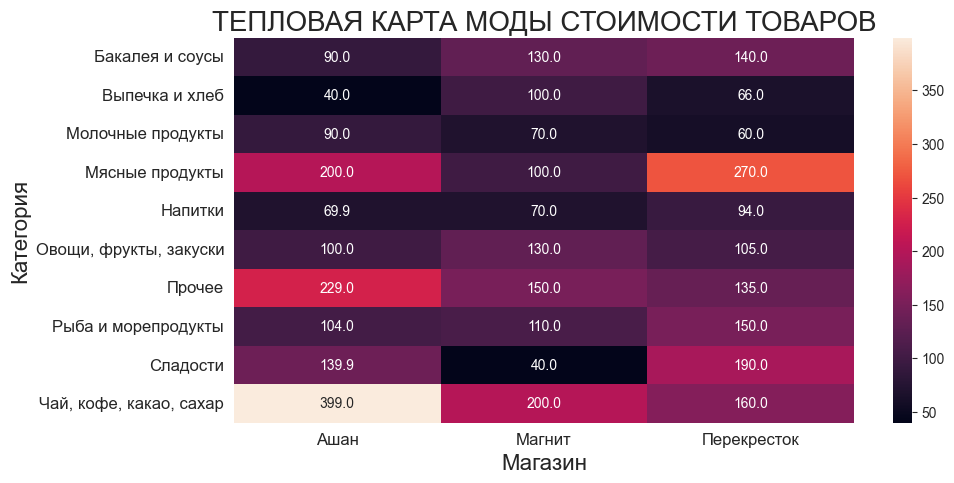

In [18]:
plt.figure(figsize=(10,5))
pivot_table = pr.pivot_table(index='general_category', columns='shop_rus', values='price', aggfunc=lambda x: x.mode().max())
plt.title('ТЕПЛОВАЯ КАРТА МОДЫ СТОИМОСТИ ТОВАРОВ', fontsize=20)
sns.heatmap(pivot_table, cmap='rocket', annot=True, fmt=".1f")
plt.xlabel('Магазин', fontsize=16)
plt.ylabel('Категория', fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [19]:
# import nltk
# from nltk.corpus import stopwords
# from pymystem3 import Mystem
# from string import punctuation
# nltk.download('stopwords')

In [20]:
# mystem = Mystem() 
# russian_stopwords = stopwords.words("russian")
# russian_stopwords.extend(['лента','ассорт','разм','арт','что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'г', 'шт'])

In [21]:
# import re

# def remove_words_with_g(string):
#     pattern = r"\b\d+(г|шт)\b"
#     modified_string = re.sub(pattern, "", string)
#     return modified_string.strip()

# def preprocess_text(text):
#     text = str(text)
#     text = remove_words_with_g(text)
#     tokens = mystem.lemmatize(text.lower())
#     tokens = [token for token in tokens if token not in russian_stopwords\
#               and token != " " \
#               and len(token)>=3 \
#               and token.strip() not in punctuation \
#               and token.isdigit()==False]
#     text = " ".join(tokens)
#     return text

# preprocess_text("Вы говорили: Нам пора расстаться, Что вас измучила Моя шальная жизнь, Что вам пора за дело приниматься, А мой удел - Катиться дальше, вниз.")

In [22]:
# print("Было:", products['name'][0])
# print("Стало:", preprocess_text(products['name'][0]))
# print()
# print("Было:", products['name'][10])
# print("Стало:", preprocess_text(products['name'][10]))

In [23]:
# products_new = products[products.shop != 'ashan']
# products_new.head()

In [24]:
# prods = products_new.sample(2000)
# prods['clear_name']=prods['name'].apply(preprocess_text)
# prods.head()

In [25]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB
# from imblearn.pipeline import Pipeline

# x = prods.clear_name
# y = prods.general_category
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
#                      ('tfidf', TfidfTransformer()), 
#                     ('clf', MultinomialNB())])

# text_clf = text_clf.fit(X_train, y_train)
# y_pred = text_clf.predict(X_test)

# print('Score:', text_clf.score(X_test, y_test))